In [81]:
import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
from tqdm.notebook import tqdm

In [ ]:
path = 'chromedriver.exe'
driver = webdriver.Chrome('../driver/chromedriver.exe')

driver.get('http://www.naver.com')
time.sleep(2)

In [74]:
query_txt = input('1.크롤링할 텍스트는 무엇? : ')

1.크롤링할 텍스트는 무엇? : 홈파티음식


In [75]:
element = driver.find_element_by_id('query')
element.send_keys(query_txt)
element.submit()

driver.find_element_by_link_text('블로그').click()

In [78]:
driver.find_element_by_css_selector('#search_option_button').click()

driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/a""").click()
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/div/ul/li[1]/a""").click()

In [79]:
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[2]/a""").click()
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[2]/div/ul/li[6]/a""").click()

In [80]:
import unicodedata
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

result = []
for i in tqdm(range(1000)):

    #제목
    title = soup.select('a.api_txt_lines.total_tit')[i].text
    title = unicodedata.normalize('NFC', title)
    
    #본문
    content = soup.select('div.total_group')[i].text
    content = unicodedata.normalize('NFC', content)
    
    #날짜
    date = soup.select('span.sub_time.sub_txt')[i].text
    
    data = [title, content, date]
    result.append(data)


results_df = pd.DataFrame(result)
results_df.columns = ['title','content','date']
results_df.to_excel('../data/blog_homeparty_food.xlsx')

In [59]:
mealkit = pd.read_excel('../data/blog_mealkit.xlsx')
mealkit

,Unnamed: 0,title,content,date
0,0,"밀키트, 피코크 마라샹궈 괜찮아요",요즘 제가 꽂힌 #밀키트 이마트 피코크 마라샹궈에요ㅎ 마라탕은 못먹는데 마라샹...,2020.11.26.
1,1,국물떡볶이 은영이 떡볶이 캠핑 밀키트도 굳!,"캠핑 밀키트도 굳! 아이들 간식으로도 인기만점이지만, 사실 어른들이 더 좋아하...",2020.11.03.
2,2,경산 간편조리 밀키트 등갈비찜 & 해물누룽지탕 굿,밀키트 정말 잘 나오는군요 ㅎㅎ 그저 레시피대로 따라하면 됩니다 ㅎㅎ 만들고 ...,2020.11.22.
3,3,부대찌개 밀키트 간편하고 맛있는 창영이 부대찌개,때 밀키트 요리를 많이 이용합니다. 모든 재료가 손질되어 있어 넣고 끓이면 완...,5일 전
4,4,홈파티음식 잇츠온 밀키트로 양식 한상 뚝딱 준비해요,홈파티음식 잇츠온 밀키트로 양식 한상 뚝딱 준비해요 벌써 올 한해가 훌~쩍.....,3일 전
...,...,...,...,...
995,995,하이프레시 밀키트 떡볶이로 집에서 간단한 요리 한상이...,"컵밀키트, #시간지정배송 하이프레시를 아시나요? 한국야쿠르트에서 만든 모바일 ...",2020.11.12.
996,996,간편요리 밀키트 윤가네감자탕으로 한끼 해결,간편요리 밀키트 윤가네감자탕으로 한끼 해결 매일 3끼는 정말 어렵다... 요리...,2020.09.25.
997,997,냉동피자 노모어피자 밀키트로 맛있게 즐겨요~,냉동피자 노모어피자 밀키트로 맛있게 즐겨요~ 요즘 같을때에는 밀키트 쟁여놓는거...,2020.09.14.
998,998,누룽지탕 밀키트 샀다,누룽지탕 밀키트 샀다 원래 사던 누룽지탕 밀키트집 말고 다른 곳 시켜봤는데 떼...,2020.08.13.


In [2]:
import pandas as pd

blog_kn = pd.DataFrame( [ ] )

f_list = ['../data/blog_mealkit.xlsx',
          '../data/blog_mealkit_recomm.xlsx',
          '../data/blog_cookingbox.xlsx',
          '../data/blog_homeparty_food.xlsx']
          
          
for fname in f_list:
    fpath = fname
    print(fpath)
    temp = pd.read_excel(fpath)
    blog_kn = blog_kn.append(temp)

blog_kn.columns =['index','title','content','date']

../data/blog_mealkit.xlsx
../data/blog_mealkit_recomm.xlsx
../data/blog_cookingbox.xlsx
../data/blog_homeparty_food.xlsx


In [3]:
blog_kn = blog_kn.reset_index(drop=True,inplace=False)

In [4]:
del blog_kn['index']

In [5]:
blog_kn

,title,content,date
0,"밀키트, 피코크 마라샹궈 괜찮아요",요즘 제가 꽂힌 #밀키트 이마트 피코크 마라샹궈에요ㅎ 마라탕은 못먹는데 마라샹...,2020.11.26.
1,국물떡볶이 은영이 떡볶이 캠핑 밀키트도 굳!,"캠핑 밀키트도 굳! 아이들 간식으로도 인기만점이지만, 사실 어른들이 더 좋아하...",2020.11.03.
2,경산 간편조리 밀키트 등갈비찜 & 해물누룽지탕 굿,밀키트 정말 잘 나오는군요 ㅎㅎ 그저 레시피대로 따라하면 됩니다 ㅎㅎ 만들고 ...,2020.11.22.
3,부대찌개 밀키트 간편하고 맛있는 창영이 부대찌개,때 밀키트 요리를 많이 이용합니다. 모든 재료가 손질되어 있어 넣고 끓이면 완...,5일 전
4,홈파티음식 잇츠온 밀키트로 양식 한상 뚝딱 준비해요,홈파티음식 잇츠온 밀키트로 양식 한상 뚝딱 준비해요 벌써 올 한해가 훌~쩍.....,3일 전
...,...,...,...
3995,잇츠온 양식 밀키트 홈파티 세트로 미리 크리스마스 파티!,맛있게 파티음식을 차릴 수 있다면 자주 이용할 의사가 있어요. 파티음식을......,3일 전
3996,※집에서도 예쁘게 홈파티음식 만들기!,해서 홈 파티를 하게 되었습니다. 홈 파티 음식 추천! 홈 파티 음식을 준비하...,2020.09.03.
3997,"(6) : 어스, 핸드위치 US, HANDWICH 배달 / 나홀로 홈파티 무드",연말인데 금요일인데 혼자 있으려니 적적해서 혼자 홈파티를 해보기로 한다. 파티...,어제
3998,광주 화정동 맛집 홈파티 음식으로 테스팅노트,미리 전화로 12시까지 찾으러 간다 예약하고 갔었는데 딱 맞게 나와서 음식이....,2020.09.18.


In [6]:
blog_kn.drop_duplicates(subset = ["title"], inplace = True)
print(blog_kn)
blog_kn.to_excel('../data/crawling_blog_kn.xlsx', index = False)

                                            title  \
0                              밀키트, 피코크 마라샹궈 괜찮아요   
1                        국물떡볶이 은영이 떡볶이 캠핑 밀키트도 굳!   
2                     경산 간편조리 밀키트 등갈비찜 & 해물누룽지탕 굿   
3                      부대찌개 밀키트 간편하고 맛있는 창영이 부대찌개   
4                    홈파티음식 잇츠온 밀키트로 양식 한상 뚝딱 준비해요   
...                                           ...   
3994             연말 홈파티 음식에 진심인 사옹원에서 간편하게 준비 끝!!   
3996                         ※집에서도 예쁘게 홈파티음식 만들기!   
3997  (6) : 어스, 핸드위치 US, HANDWICH 배달 / 나홀로 홈파티 무드   
3998                     광주 화정동 맛집 홈파티 음식으로 테스팅노트   
3999                            홈파티음식 핑거푸드 카나페만들기   

                                                content         date  
0        요즘 제가 꽂힌 #밀키트 이마트 피코크 마라샹궈에요ㅎ 마라탕은 못먹는데 마라샹...  2020.11.26.  
1        캠핑 밀키트도 굳! 아이들 간식으로도 인기만점이지만, 사실 어른들이 더 좋아하...  2020.11.03.  
2        밀키트 정말 잘 나오는군요 ㅎㅎ 그저 레시피대로 따라하면 됩니다 ㅎㅎ 만들고 ...  2020.11.22.  
3        때 밀키트 요리를 많이 이용합니다. 모든 재료가 손질되어 있어 넣고 끓이면 완...         5일 전  
4       

In [15]:
len(blog_kn)

3593

In [25]:
fresheasy = blog_kn['content'].str.contains('프레시지|fresheasy|Fresheasy|FRESHEASY|프레시이지')
fresh_count = blog_kn[fresheasy]
len(fresh_count)

151

In [21]:
fresh_count

,title,content,date
15,프레시지 뿌팟퐁커리 밀키트 집에서 즐기는 타이음식,프레시지 뿌팟퐁커리 밀키트 집에서 즐기는 타이음식 가끔씩 즐기던 여행이... ...,2020.11.03.
34,프레시지 밀키트 티본 스테이크 & 파스타 우리집 홈파티메뉴 :),"요즘 냉동,냉장실에 자리잡은 프레시지 밀키트홈파티메뉴 로 기분도 낼수 있고, ...",2일 전
42,주말저녁메뉴 프레시지 밀키트 블랙라벨 스테이크,주말저녁메뉴 프레시지 밀키트 블랙라벨 스테이크 온라인 마켓에서 프레시지... ...,3일 전
65,소고기 야끼소바 _ 노브랜드 밀키트,이보다 편할 수 없다 노브랜드에서 프레시지 소고기 야끼소바 구입했어요 만드는 ...,2020.12.04.
93,연말 홈파티 음식; 프레시지 밀푀유나베 밀키트,#프레시지 #프레시지밀키트 #밀푀유나베 #파티음식 #연말파티 #홈파티 #음식준...,어제
...,...,...,...
3379,홈파티음식 10분완성 프레시지 밀키트...,홈파티음식 10분완성 프레시지 밀키트 스노윙치즈빠네찹스테이크 글/사진 앨리스....,2020.05.23.
3430,"프레시지 신메뉴 밀키트, 홈파티음식...",발라둔 빵도 달콤하고 풍미가 좋아서 너무 잘 어우러지더라고요 #프레시지 #밀키...,2020.05.25.
3558,홈파티음식 프레시지밀키트 이용해 뚝딱,제가 홈파티음식 준비한 프레시지밀키트 외에 여러가지 간편 음식들을 구입할 수....,2020.09.23.
3643,프레시지 밀키트로 홈파티 미싱더시티 이탈리아 티본스테이크,연말 홈파티 분위기 좀 내봤어요 : ) 프레시지 밀키트 미싱더시티 피렌체를.....,2시간 전


In [22]:
블로그 관련 키워드 총 3593개
그 중에 타이틀에 프레시지가 들어간 행의 개수 151개

SyntaxError: invalid syntax (<ipython-input-22-527e9a034f01>, line 1)

In [26]:
round(151/3593*100,2)

4.2

In [34]:
from matplotlib import font_manager, rc

f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = f_path).get_name()
rc('font', family = font_name)

%matplotlib inline
import matplotlib.pyplot as plt

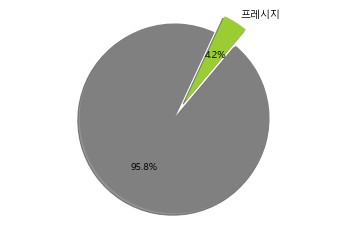

In [35]:
labels = '프레시지',' '
sizes = [4.2,95.8]
colors = ['yellowgreen','grey']
explode = (0,0.2)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow =True, startangle = 410)
plt.axis('equal')
plt.show()